# Business Understanding
### Here I propose three questions of the interest related to the education proformance:  
-  Which country got the highest Parent school Satisfaction? 
-  How do absences affect parent-school satisfaction ? 
-  Which topics got the highest number of raised hands?


In [2]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Data Understanding
### This section will be used to read and Understand the data what represents.

In [3]:
# Load the Census dataset
data = pd.read_csv("xAPI-Edu-Data.csv")
# Displaying the first record
data.head(n=5)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# Total number of records
n_records = len(data)
print("Total number of records: {}".format(n_records))
print("Number of columns:" , data.shape[1])

Total number of records: 480
Number of columns: 17


In [5]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
# Displaying all attributes in each column.
for column in data:
    print(column, data[column].unique(),'\n')

gender ['M' 'F'] 

NationalITy ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia'] 

PlaceofBirth ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia'] 

StageID ['lowerlevel' 'MiddleSchool' 'HighSchool'] 

GradeID ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

SectionID ['A' 'B' 'C'] 

Topic ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

Semester ['F' 'S'] 

Relation ['Father' 'Mum'] 

raisedhands [ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84] 

VisITedResources 

# Data Preparation:
### This section will be used to prepare and clean the data for further analysis.

In [8]:
# This to transform data from string / object values to numiric values to prepare this data to 
sectionIdMap = {
 'A':1,
 'B':2,
 'C':3,
}
# Creating new column transform old column to numiric values
data['SectionId'] = data['SectionID'].apply(lambda x: sectionIdMap[x])
# Deleting old column
data=data.drop(['SectionID'], axis=1)

In [9]:
# This to transform data from string / object values to numiric values 
SemesterMap = {
 'F':1,
 'S':2,
}
# Creating new column transform old column to numiric values
data['newSemester'] = data['Semester'].apply(lambda x: SemesterMap[x])
# Deleting old column
data=data.drop(['Semester'], axis=1)

In [10]:
# This to transform data from string / object values to numiric values 
ParentSchoolSatisfactionMap = {
 'Good':1,
 'Bad':0,
}
# Creating new column transform old column to numiric values
data['PSchoolSatisfaction'] = data['ParentschoolSatisfaction'].apply(lambda x: ParentSchoolSatisfactionMap[x])
# Deleting old column
data=data.drop(['ParentschoolSatisfaction'], axis=1)
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays,Class,SectionId,newSemester,PSchoolSatisfaction
0,M,KW,KuwaIT,lowerlevel,G-04,IT,Father,15,16,2,20,Yes,Under-7,M,1,1,1
1,M,KW,KuwaIT,lowerlevel,G-04,IT,Father,20,20,3,25,Yes,Under-7,M,1,1,1
2,M,KW,KuwaIT,lowerlevel,G-04,IT,Father,10,7,0,30,No,Above-7,L,1,1,0
3,M,KW,KuwaIT,lowerlevel,G-04,IT,Father,30,25,5,35,No,Above-7,L,1,1,0
4,M,KW,KuwaIT,lowerlevel,G-04,IT,Father,40,50,12,50,No,Above-7,M,1,1,0


### Now that you've trimmed and cleaned your data, you're ready to move on to compute statistics and create visualizations with the goal of addressing the research questions.

## Question 1: Which country got the highest parent school satisfaction? 

In [11]:
result1 = data.groupby(['NationalITy'])['PSchoolSatisfaction'].count().head()


Text(0, 0.5, 'Number of Parent Satisfied')

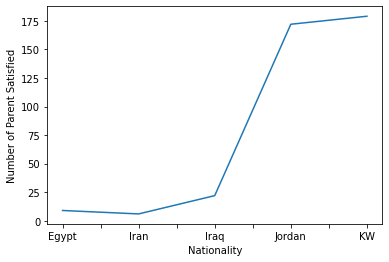

In [63]:
result1.plot.line()
plt.xlabel("Nationality")
plt.ylabel("Number of Parent Satisfied")

## Question 2: How do absences affect parent-school satisfaction ? 

Text(0, 0.5, 'Number of Students')

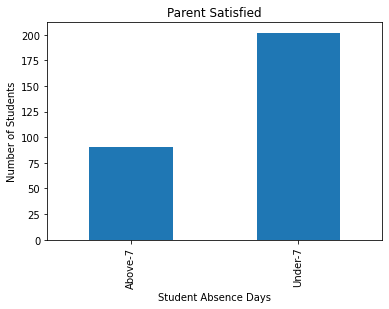

In [64]:
result2=data[['StudentAbsenceDays', 'PSchoolSatisfaction']].sort_values('PSchoolSatisfaction')
satisfied = result2[result2.PSchoolSatisfaction == 1].groupby(['StudentAbsenceDays'])['PSchoolSatisfaction'].count()
satisfied.plot.bar()
plt.title("Parent Satisfied")
plt.xlabel("Student Absence Days")
plt.ylabel("Number of Students")

Text(0, 0.5, 'Number of Students')

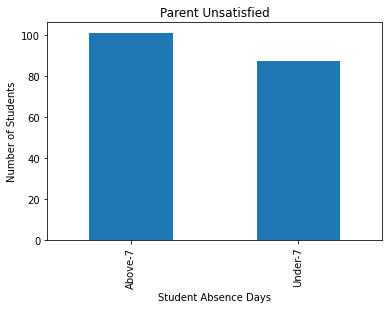

In [105]:
notSatisfied= result2[result2.PSchoolSatisfaction == 0].groupby(['StudentAbsenceDays'])['PSchoolSatisfaction'].count()
notSatisfied.plot.bar()
plt.title("Parent Unsatisfied")
plt.xlabel("Student Absence Days")
plt.ylabel("Number of Students")

## Question 3: Which topics got the highest number of raised hands? 

Text(0, 0.5, 'Number of Raised Hands')

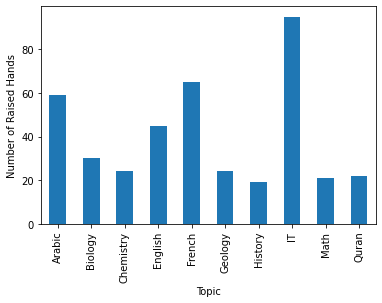

In [107]:
result3=data.groupby(['Topic'])['raisedhands'].count().head(10)
result3.plot.bar()
plt.xlabel("Topic")
plt.ylabel("Number of Raised Hands")

# Conclusion:
- ### Its clear that Kuwait got highest parent school satisfaction.
- ### Also after analysing the data we noted that attend more get more likely his parent satisfaction.
- ### Lastly, IT subject is the highest number of raised hands